In [1]:
# Imports
import warnings
import sys
import os
import numpy as np

warnings.filterwarnings("ignore")

dirpath = os.path.join( '/'.join(os.getcwd().split("/")[:-3]), 'src')
sys.path.insert(0, dirpath)

# HAI CookBook - plots with `holisticai`

## Classification

In [2]:
from holisticai.datasets import make_classification
classification_data = make_classification()

### Bias

In [3]:
from holisticai.plots.bias import abroca_plot

<Axes: title={'center': 'Abroca plot'}, xlabel='fpr', ylabel='tpr'>

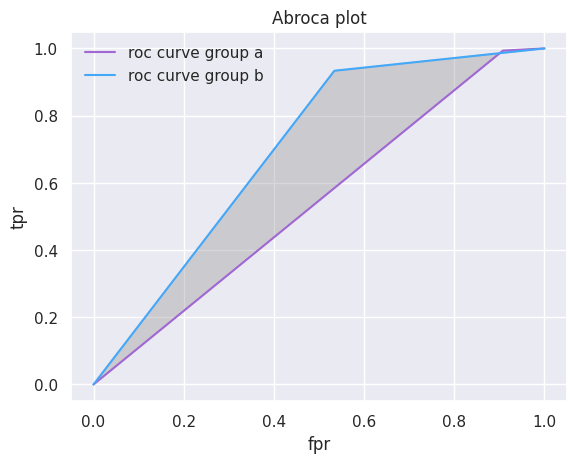

In [4]:
abroca_plot(
    group_a=classification_data['group_a'], 
    group_b=classification_data['group_b'], 
    y_pred=classification_data['y_pred'], 
    y_true=classification_data['y_true'],
    )

## Exploratory Analysis

### Bias

In [5]:
from holisticai.plots.bias import (
    correlation_matrix_plot,
    distribution_plot,
    group_pie_plot,
    histogram_plot,
)

<Axes: title={'center': 'Correlation matrix'}>

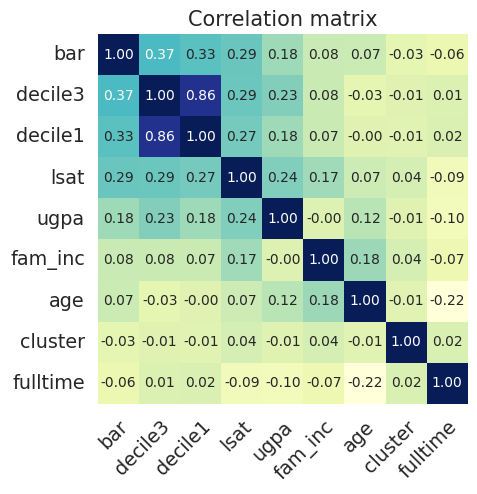

In [6]:
correlation_matrix_plot(classification_data['data'], classification_data['output_name'])

<Axes: title={'center': 'Group proportions'}>

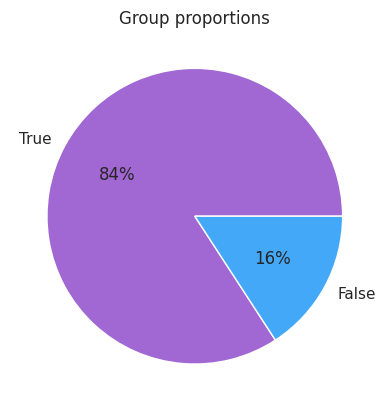

In [7]:
group_pie_plot(classification_data['group_a'])

<Axes: title={'center': 'Histogram Plot'}, xlabel='race1', ylabel='Probability'>

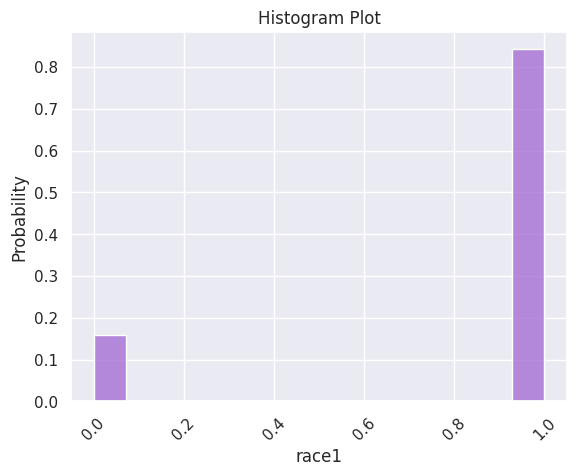

In [8]:
histogram_plot(classification_data['group_a'])

## Multiclass

In [9]:
from holisticai.datasets import make_multiclass
multiclass_data = make_multiclass()

### Bias

In [10]:
from holisticai.plots.bias import (
    accuracy_bar_plot,
    disparate_impact_plot,
    frequency_matrix_plot,
    frequency_plot,
    statistical_parity_plot,
)

<Axes: title={'center': 'Accuracy Bar Plot'}, xlabel='Group', ylabel='Accuracy'>

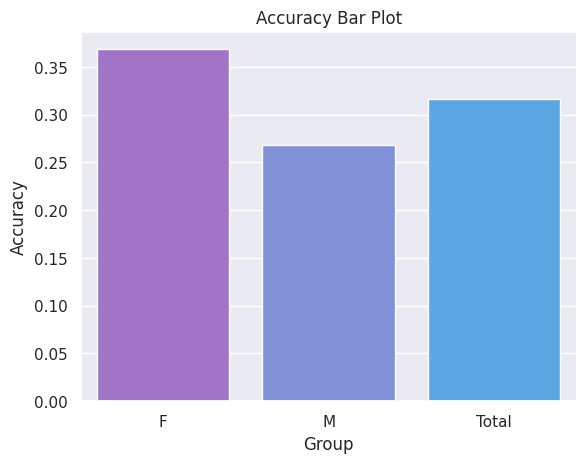

In [11]:
accuracy_bar_plot(multiclass_data['p_attr'], multiclass_data['y_pred'], multiclass_data['y_true'])

<Axes: title={'center': 'Disparate Impact plot'}, xlabel='Group', ylabel='Disparate Impact'>

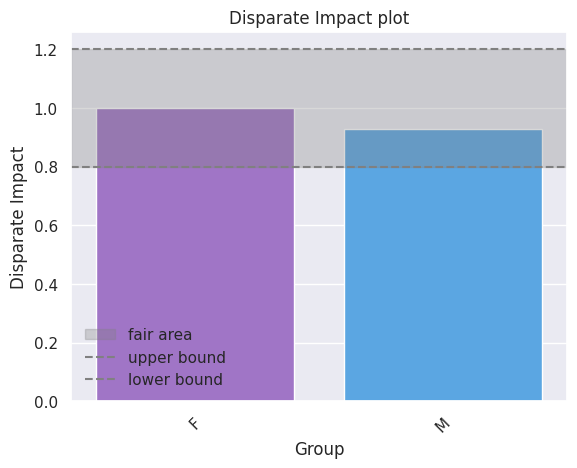

In [12]:
disparate_impact_plot(multiclass_data['p_attr'], multiclass_data['y_pred'])

<Axes: title={'center': 'Frequency matrix plot'}, xlabel='Class', ylabel='Group'>

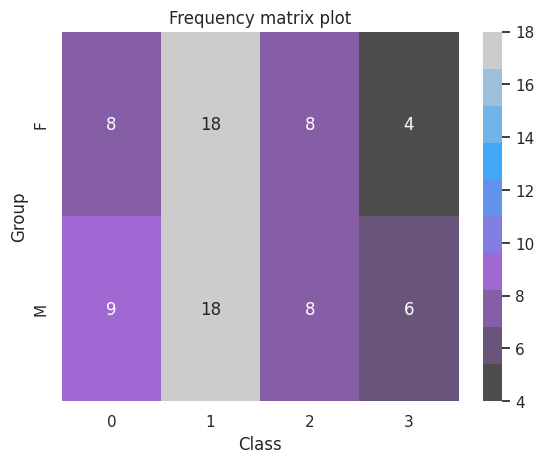

In [13]:
frequency_matrix_plot(multiclass_data['p_attr'], multiclass_data['y_pred'])

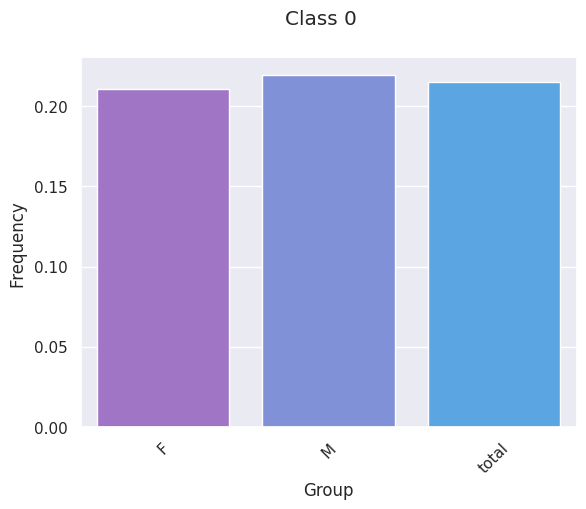

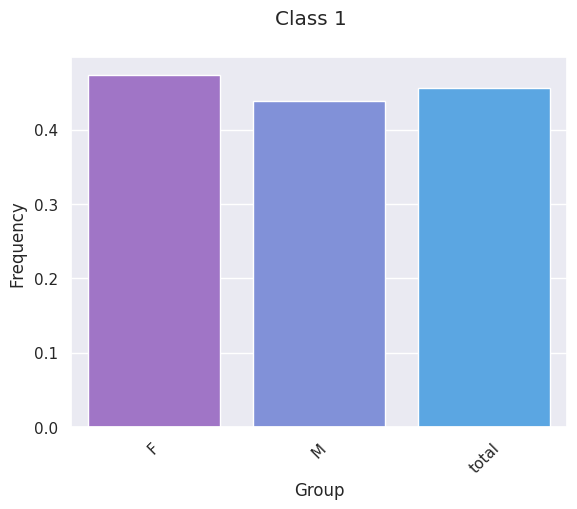

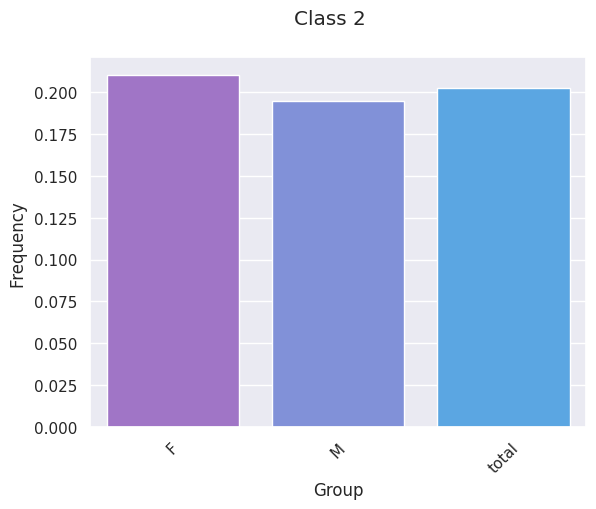

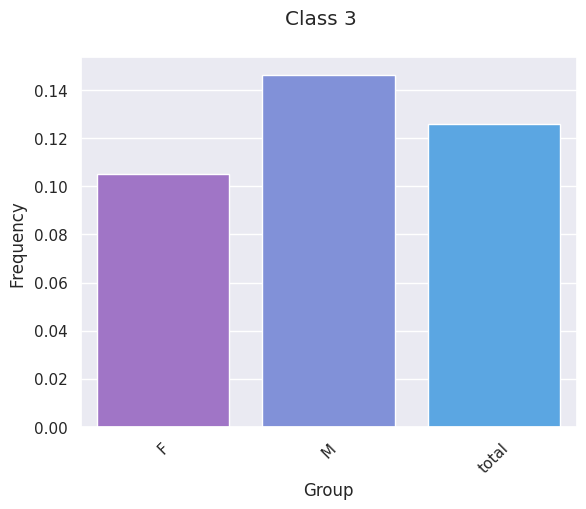

In [14]:
frequency_plot(multiclass_data['p_attr'], multiclass_data['y_pred'])

<Axes: title={'center': 'Statistical Parity plot'}, xlabel='Group', ylabel='Statistical Parity'>

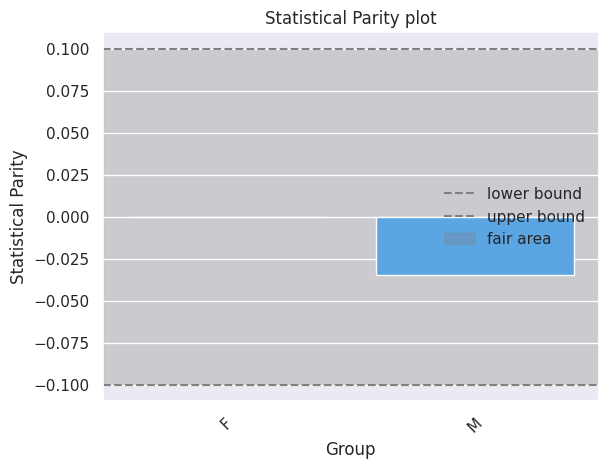

In [15]:
statistical_parity_plot(multiclass_data['p_attr'], multiclass_data['y_pred'])

## Regression Plots

In [16]:
from holisticai.datasets import make_regression
regression_data = make_regression()

### Bias

In [17]:
from holisticai.plots.bias import (
    disparate_impact_curve,
    mae_bar_plot,
    distribution_plot,
    rmse_bar_plot,
    statistical_parity_curve,
    success_rate_curve,
    success_rate_curves,
)

<Axes: title={'center': 'Disparate Impact Curve'}, xlabel='Score', ylabel='Disparate Impact'>

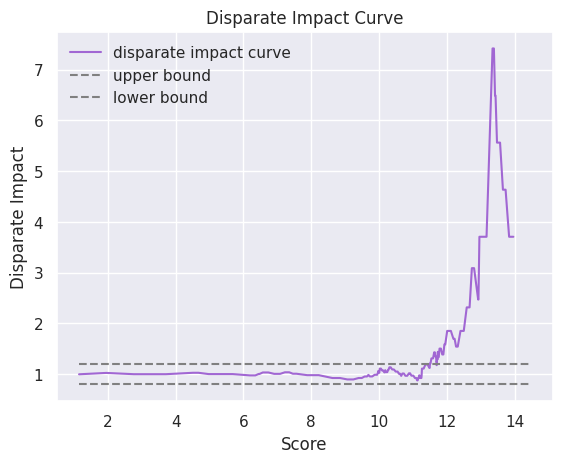

In [18]:
disparate_impact_curve(regression_data['group_a'], regression_data['group_b'], regression_data['y_pred'])

<Axes: title={'center': 'MAE bar plot'}, xlabel='Group', ylabel='MAE'>

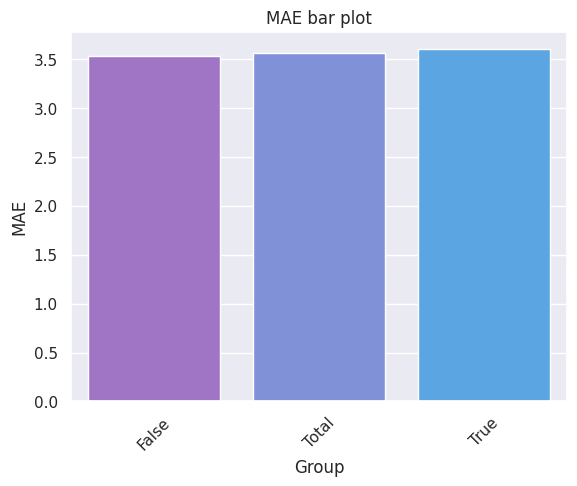

In [19]:
mae_bar_plot(regression_data['group_b'], regression_data['y_pred'], regression_data['y_true'])

<Axes: title={'center': 'RMSE bar plot'}, xlabel='Group', ylabel='RMSE'>

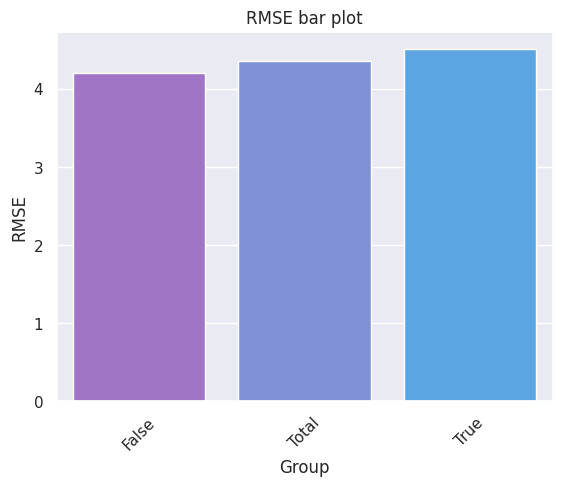

In [20]:
rmse_bar_plot(regression_data['group_b'], regression_data['y_pred'], regression_data['y_true'])

<Axes: title={'center': 'Statistical Parity Curve'}, xlabel='Score', ylabel='Success Rate A - Sucess Rate B'>

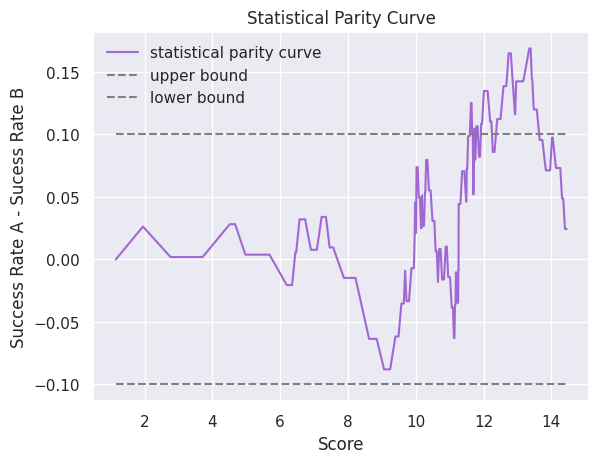

In [21]:
statistical_parity_curve(regression_data['group_a'], regression_data['group_b'], regression_data['y_pred'])

<Axes: title={'center': 'Sucess rate A vs B curve'}, xlabel='Group B Success Rate %', ylabel='Group A Success Rate %'>

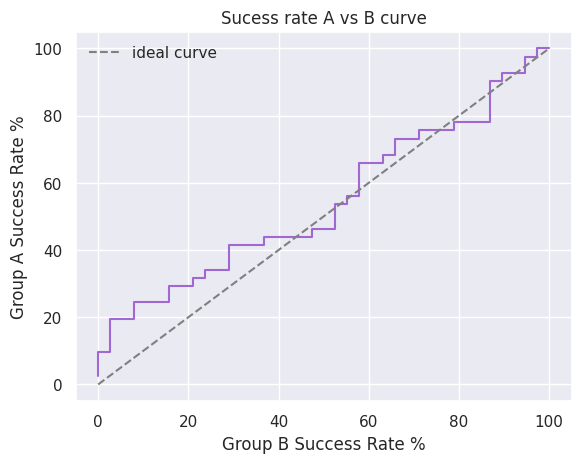

In [22]:
success_rate_curve(regression_data['group_a'], regression_data['group_b'], regression_data['y_pred'])

<Axes: title={'center': 'Success Rate Curves'}, xlabel='Score'>

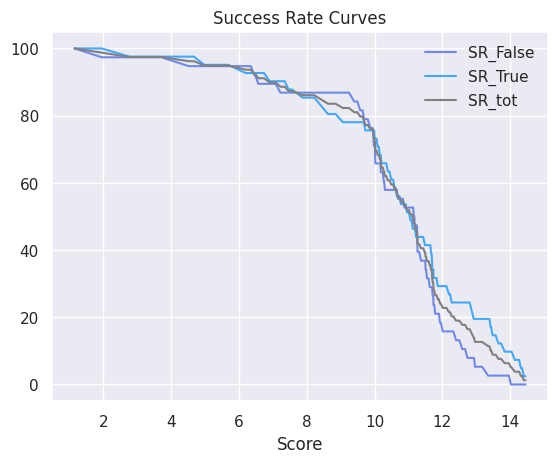

In [23]:
success_rate_curves(regression_data['group_a'], regression_data['y_pred'])

<Axes: title={'center': 'Distribution Plot'}, xlabel='G3', ylabel='Density'>

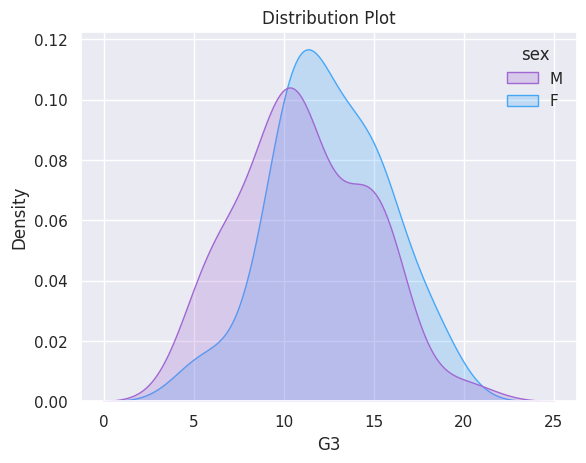

In [24]:
distribution_plot(regression_data['data']['G3'], regression_data['p_attr']['sex'])

## Recommender

### Bias

In [25]:
from holisticai.datasets import load_dataset
dataset = load_dataset('lastfm')

In [26]:
from holisticai.plots.bias import exposure_diff_plot, exposure_ratio_plot, long_tail_plot

<Axes: title={'center': 'Long Tail Plot'}, xlabel='Items (sorted by popularity)', ylabel='Item Count'>

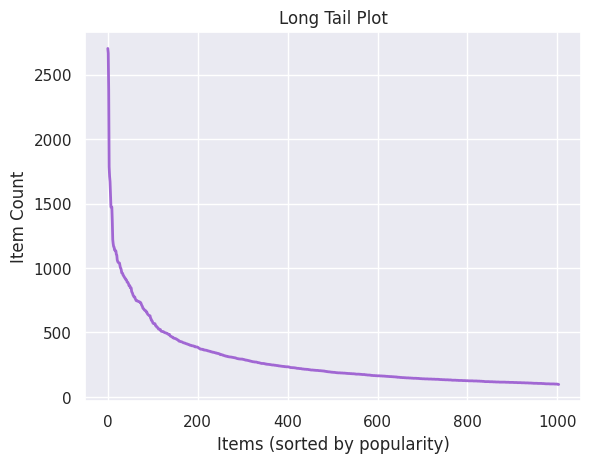

In [27]:
long_tail_plot(dataset['data_pivot'].to_numpy())

<Axes: title={'center': 'Exposure Difference Plot'}, xlabel='Items (sorted by exposure difference)', ylabel='$Exposure_a - Exposure_b$'>

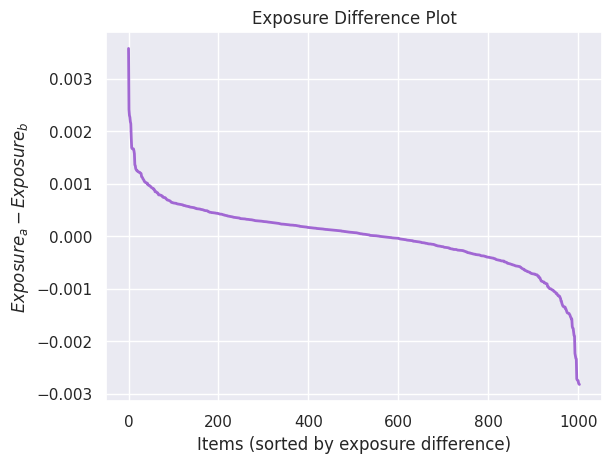

In [28]:
# sorted exposure differences
group_a = dataset['p_attr']
group_b = ~dataset['p_attr']
exposure_diff_plot(group_a, group_b, dataset['data_pivot'].to_numpy())

<Axes: title={'center': 'Exposure Ratio Plot'}, xlabel='Items (sorted by exposure ratio)', ylabel='$Exposure_a/Exposure_b$'>

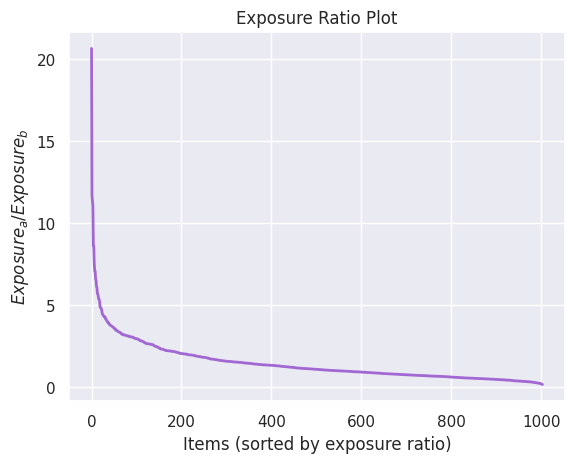

In [29]:
# sorted exposure ratios
exposure_ratio_plot(group_a, group_b, dataset['data_pivot'].to_numpy())

## Report

### Bias

In [30]:
from holisticai.metrics.bias import classification_bias_metrics
# create a table with bias metrics results
metrics = classification_bias_metrics(
    classification_data['group_a'],
    classification_data['group_b'],
    classification_data['y_pred'], 
    classification_data['y_true'], 
    metric_type='equal_outcome'
    )

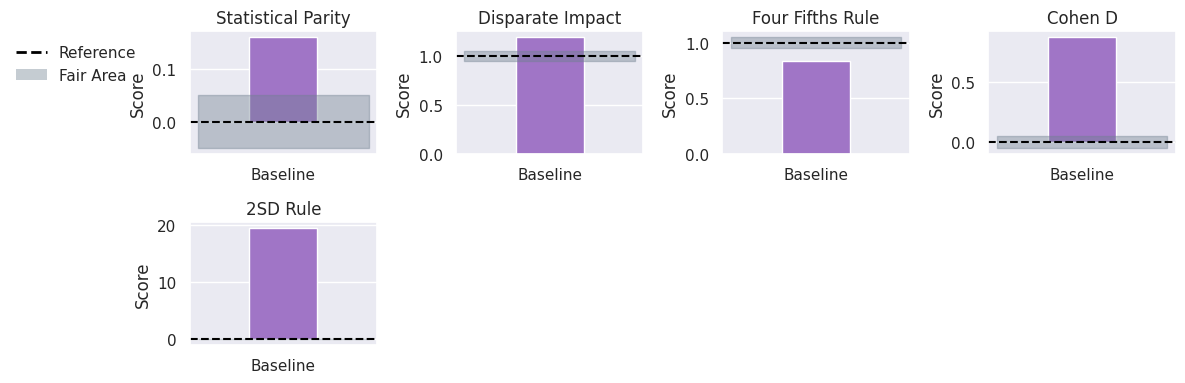

In [31]:
from holisticai.plots.bias import bias_metrics_report
bias_metrics_report('binary_classification', metrics)

In [32]:
from holisticai.metrics.bias import regression_bias_metrics
# create a table with bias metrics results
metrics = regression_bias_metrics(
    regression_data['group_a'],
    regression_data['group_b'],
    regression_data['y_pred'], 
    regression_data['y_true'], 
    metric_type='equal_outcome'
    )

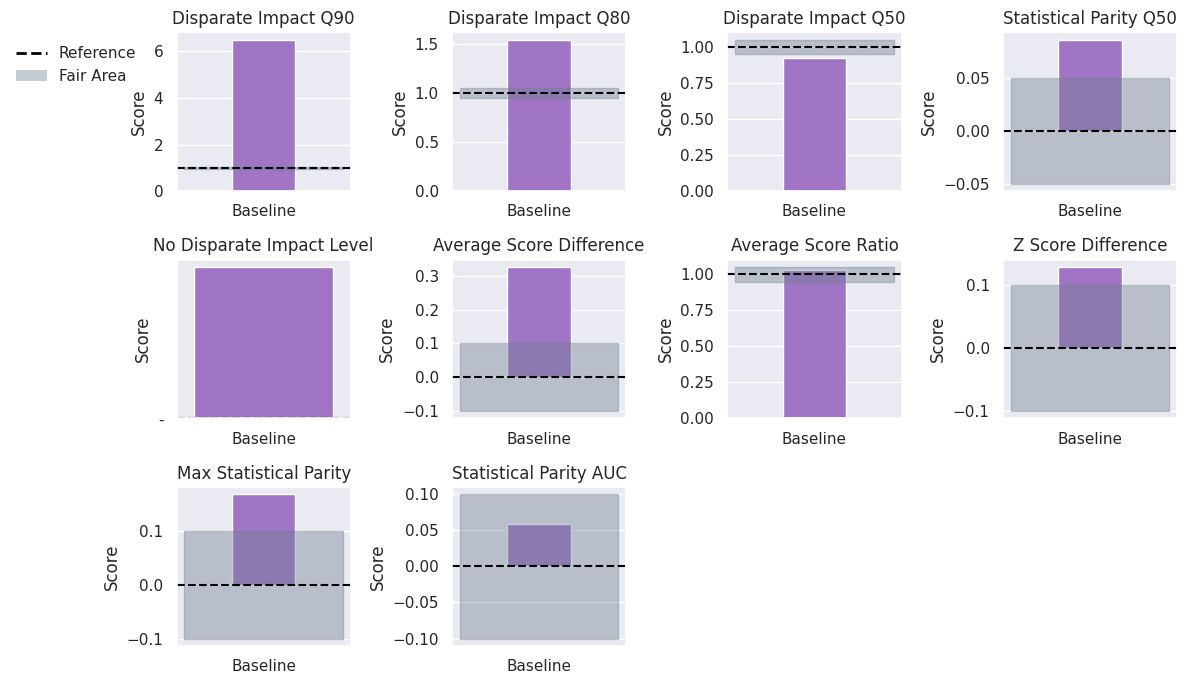

In [33]:
bias_metrics_report('regression', metrics)